# Mitigating Bias with AIF360


## Calculating actual disparate impact on testing values from original dataset
This tutorial demonstrates classification model learning with bias mitigation as a part of a Customer Churn prediction use case using the Banking dataset. The dataset has been collected from the Kaggle website "https://www.kaggle.com/kmalit/bank-customer-churn-prediction/data". The notebook demonstrates how the AIF 360 toolkit can be used to detect and reduce bias in churn predictions when learning classifiers using a variety of disparity fairness metrics and algorithms. It also demonstrates how explanations can be generated for predictions made by models learned with the toolkit using LIME.

Classifiers are built using Logistic Regression.Bias detection is demonstrated using disparate impact metrics.Bias alleviation is explored by including disparate impact remover (pre-processing technique).

Data from the bank-customer-churn prediction is used in this tutorial.


## Table of Contents
To return to the table of contents, click on the number at any major section heading.

1. Use case

2. Data used

3. Data Preparation

4. Summary of bias statistics before pre-processing algorithm is run

4. Disparate impact remover (pre-processing bias mitigation)

5. Training model on the new dataset with disparate impact remover applied.

6. Summary of bias statistics

10. Overall Summary

## 1. Use case
In order to demonstrate how AIF 360 can be used to detect and mitigate bias in classfier models, we adopt the following use case:

A data scientist develops a 'fair' churn prediction model with respect to defined protected classes. Fairness may be dictated by legal or government regulations, such as a requirement that churn decisions be not predicated on factors such as the gender of the customer. Here we classify the gender "female" as the unpriviledged class while the "male" is classified as priviledged. As we need to identify/predict the customer who churn, we classify the favourable outcome as customers who churned ( =1)
Finally bias metrics and algorithms are run to identify and remove bias from the prediction AI model.


## 2. Data Used
The data used for the use case is collected from kaggle "https://www.kaggle.com/kmalit/bank-customer-churn-prediction/data".
For this use case the data used consists of 13 features one label and 10000 instances. The feature gender is classified as the priviledged/un priviledged class.
More details about the dataset are mentioned as the code is run.


## 2. Data Preparation 

### Loading all necessary Packages


In [1]:
# Loading AIF360 libraries
!pip install "aif360[all]"
!pip install xport==2.0.2
!pip install csv
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [2]:
# Loading data libraries 
import numpy as np
import pandas as pd
import aif360
from aif360.algorithms.preprocessing import DisparateImpactRemover
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
pd.options.mode.chained_assignment = None  
# default='warn', silencing Setting With Copy warning

# Loading visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Reading the data

In [3]:
df = pd.read_csv('Churn_Modelling.csv', delimiter=',')
df


RowNumber  CustomerId                  Surname  CreditScore Geography  \
0             1    15634602                 Hargrave          619    France   
1             2    15647311                     Hill          608     Spain   
2             3    15619304                     Onio          502    France   
3             4    15701354                     Boni          699    France   
4             5    15737888                 Mitchell          850     Spain   
5             6    15574012                      Chu          645     Spain   
6             7    15592531                 Bartlett          822    France   
7             8    15656148                   Obinna          376   Germany   
8             9    15792365                       He          501    France   
9            10    15592389                       H?          684    France   
10           11    15767821                   Bearce          528    France   
11           12    15737173                  Andrews          497     Spain   
12           13    15632264                      Kay          476    France   
13           14    15691483                     Chin          549    France   
14           15    15600882                    Scott          635     Spain   
15           16    15643966                  Goforth          616   Germany   
16           17    15737452                    Romeo          653   Germany   
17           18    15788218                Henderson          549     Spain   
18           19    15661507                  Muldrow          587     Spain   
19           20    15568982                      Hao          726    France   
20           21    15577657                 McDonald          732    France   
21           22    15597945                 Dellucci          636     Spain   
22           23    15699309                Gerasimov          510     Spain   
23           24    15725737                   Mosman          669    France   
24           25    15625047                      Yen          846    France   
25           26    15738191                  Maclean          577    France   
26           27    15736816                    Young          756   Germany   
27           28    15700772                  Nebechi          571    France   
28           29    15728693               McWilliams          574   Germany   
29           30    15656300                 Lucciano          411    France   
30           31    15589475                  Azikiwe          591     Spain   
31           32    15706552            Odinakachukwu          533    France   
32           33    15750181                Sanderson          553   Germany   
33           34    15659428                  Maggard          520     Spain   
34           35    15732963                 Clements          722     Spain   
35           36    15794171                 Lombardo          475    France   
36           37    15788448                   Watson          490     Spain   
37           38    15729599                  Lorenzo          804     Spain   
38           39    15717426                Armstrong          850    France   
39           40    15585768                  Cameron          582   Germany   
40           41    15619360                    Hsiao          472     Spain   
41           42    15738148                   Clarke          465    France   
42           43    15687946                  Osborne          556    France   
43           44    15755196                   Lavine          834    France   
44           45    15684171                  Bianchi          660     Spain   
45           46    15754849                    Tyler          776   Germany   
46           47    15602280                   Martin          829   Germany   
47           48    15771573                  Okagbue          637   Germany   
48           49    15766205                      Yin          550   Germany   
49           50    15771873                   Buccho    

### Data Exploration 

#### Null/Missing Values

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Unique Values

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Visualizations

In [7]:
target_counts = df['Exited'].value_counts()
target_counts

0    7963
1    2037
Name: Exited, dtype: int64

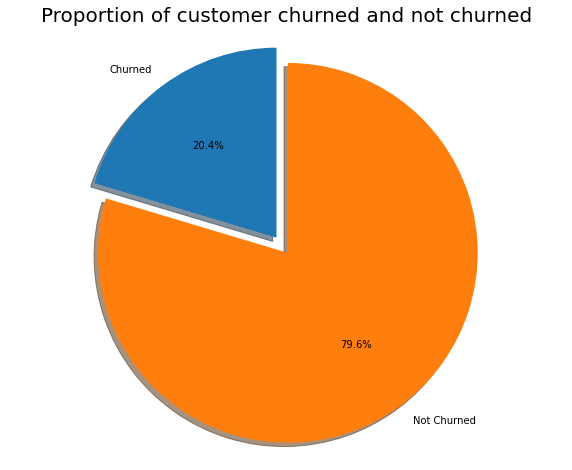

In [8]:
labels = 'Churned', 'Not Churned'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and not churned", size = 20)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

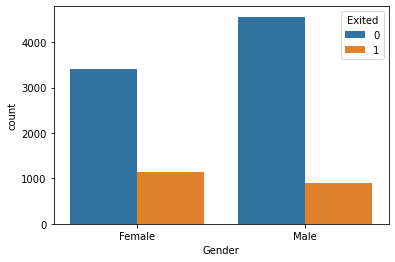

In [9]:
sns.countplot(x='Gender', hue = 'Exited',data = df)

The proportion of churned customers is much lower than non-churned customers which should be the case. As you can see from the graph above it seems like the number of instances for female are lower compared to male. When we see the visualization we can infer that the female churn percentage is much higher than the male churn percentage. This eb=nables us to define the female as unprivilaged class and male as priviledged class to check is any bias exists in the data.

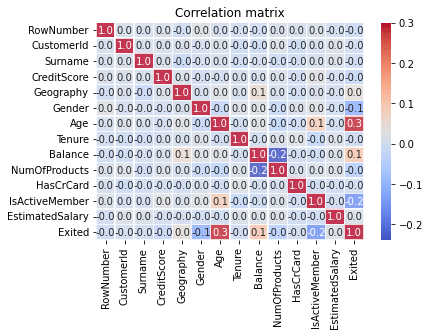

In [10]:
df1 = df.copy()
from sklearn.preprocessing import LabelEncoder
cols = df1.columns

encoder = LabelEncoder()
for col in cols:
    encoder.fit(df1[col])
    df1[col] = encoder.transform(df1[col])

corr = df1.corr()
sns.heatmap(corr,
            cmap = 'coolwarm',
            vmax=.3,
            annot = True,
            linewidths = 0.5,
            fmt = ".01f",
            alpha = 0.8)

plt.title('Correlation matrix')
plt.show()

From the above correlation table it is clear that there is no co-relation between the independent variables.

### Data Preparation

In [11]:
# Drop unnecessary column
df.head ()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [12]:
# Dropping row number customerID and surname. Also removing the geography column as we are interested in 
#what variables truly impact churn that the bank can identify other than geography and change their marketing strategy. 
df = df.drop(["RowNumber", "CustomerId", "Surname", "Geography"], axis = 1)

### Encode categorical variables

In [13]:
# Encode Male as 1, Female as 0
df.loc[df.Gender == 'Male', 'Gender'] = 1
df.loc[df.Gender == 'Female', 'Gender'] = 0
df.head()

CreditScore Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619      0   42       2       0.00              1          1   
1          608      0   41       1   83807.86              1          0   
2          502      0   42       8  159660.80              3          1   
3          699      0   39       1       0.00              2          0   
4          850      0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

### Separate dataset by x and y

In [14]:
from sklearn.model_selection import train_test_split
encoded_df = df.copy()
x = df.drop(['Exited'], axis = 1)
y = df['Exited']

### Create Test and Train splits

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(x)
# We will follow an 80-20 split pattern for our training and test data, respectively
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

## Train a Model Using Original Dataset

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = pd.Series(model.predict(x_test))
print("Accuracy:Original Dataset", metrics.accuracy_score(y_test, y_pred))


Accuracy:Original Dataset 0.789


## Bias Statistics - Original Dataset

### Calculating actual disparate impact on testing values from original dataset
Disparate Impact is defined as the ratio of favorable outcomes for the unpriviliged group divided by the ratio of favorable outcomes for the priviliged group.
The acceptable threshold is between .8 and 1.25, with .8 favoring the priviliged group, and 1.25 favoring the unpriviliged group.

In [17]:
actual_test = x_test.copy()
actual_test['Response_Actual'] = y_test
actual_test.shape

(2000, 10)

In [18]:
# Priviliged group: Males (1)
# Unpriviliged group: Females (0)
male_df = actual_test[actual_test['Gender'] == 1]
num_of_priviliged = male_df.shape[0]
female_df = actual_test[actual_test['Gender'] == 0]
num_of_unpriviliged = female_df.shape[0]

In [19]:
unpriviliged_outcomes = female_df[female_df['Response_Actual'] == 1].shape[0]
unpriviliged_ratio = unpriviliged_outcomes/num_of_unpriviliged
unpriviliged_ratio

0.25083986562150057

In [20]:
priviliged_outcomes = male_df[male_df['Response_Actual'] == 1].shape[0]
priviliged_ratio = priviliged_outcomes/num_of_priviliged
priviliged_ratio

0.16350496838301717

In [21]:
# Calculating disparate impact
disparate_impact = unpriviliged_ratio / priviliged_ratio
print("Disparate Impact, Sex vs. Predicted Loan Status: " + str(disparate_impact))

Disparate Impact, Sex vs. Predicted Loan Status: 1.534142161563542


### Arrived at a disparate income ratio of 1.53. This indicates that the actual test split favors the unprivileged group (females), as a disparate income ratio of 1 indicates complete equality.


# Mitigating Bias with AI Fairness 360

To mitigate bias, I utilized an open-source toolkit/Python package of metrics and algorithms introduced by IBM ResearcH. Bias mitigation algorithms can be generally categorized into three categories: pre-process (which affects the data, prior to training), in-process (which affects the classifier itself), and post-process (which affects the prediction labels that are output). I chose to apply a pre-processing algorithm offered by the AIF360 package, DisparateImpactRemover, which edits feature values to increase group fairness. 

AIF360 requires users to convert the Pandas dataframe into a data type they call a BinaryLabelDataSet before applying the disparate impact removal algorithm:

### Applying the Disparate Impact Remover to the dataset

In [22]:
import aif360
from aif360.algorithms.preprocessing import DisparateImpactRemover
# binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
#     df=yourDataFrameHere,
#     label_names=['yourOutcomeLabelHere'],
#     protected_attribute_names=['yourProtectedClassHere'])
# Must be a binaryLabelDataset
binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df,
    label_names=['Exited'],
    protected_attribute_names=['Gender'])
di = DisparateImpactRemover(repair_level = 1.0)
dataset_transf_train = di.fit_transform(binaryLabelDataset)
transformed = dataset_transf_train.convert_to_dataframe()[0]
transformed.head()

CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0        614.0     0.0  42.0     2.0       0.00            1.0        1.0   
1        603.0     0.0  41.0     1.0   83807.86            1.0        0.0   
2        495.0     0.0  42.0     8.0  159660.80            3.0        1.0   
3        696.0     0.0  39.0     1.0       0.00            2.0        0.0   
4        850.0     0.0  43.0     2.0  125510.82            1.0        1.0   

   IsActiveMember  EstimatedSalary  Exited  
0             1.0         97628.08     1.0  
1             1.0        109257.59     0.0  
2             0.0        111342.66     1.0  
3             0.0         90304.01     0.0  
4             1.0         76884.05     0.0

## Train a Model Using Transformed Dataset

In [23]:
x_trans = transformed.drop(['Exited'], axis = 1)
y_trans = transformed['Exited']
scaler = StandardScaler()
data_std = scaler.fit_transform(x_trans)
x_trans_train,x_trans_test,y_trans_train,y_trans_test = train_test_split(x_trans, y_trans, test_size=0.2, random_state = 0)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_trans_train, y_trans_train)

y_trans_pred = pd.Series(model.predict(x_trans_test))

print("Accuracy:", metrics.accuracy_score(y_trans_test, y_trans_pred))

Accuracy: 0.789


## Bias Statistics - Transformed Dataset

### Calculating disparate impact on predicted values by model trained on transformed dataset

In [25]:
# We now need to add this array into x_test as a column for when we calculate the fairness metrics.
y_trans_pred = model.predict(x_trans_test)
x_trans_test['Exit_Status_Predicted'] = y_trans_pred
transformed_output = x_trans_test
transformed_output.head()

CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
9394        592.0     0.0  35.0     8.0  131101.04            1.0        1.0   
898         517.0     0.0  40.0     2.0  102967.41            1.0        1.0   
2398        703.0     0.0  42.0     8.0   95386.82            1.0        1.0   
5906        788.0     1.0  32.0     4.0  110086.69            1.0        0.0   
2343        706.0     1.0  38.0     5.0  161525.96            2.0        1.0   

      IsActiveMember  EstimatedSalary  Exit_Status_Predicted  
9394             1.0        192852.67                    0.0  
898              0.0        126812.85                    0.0  
2398             1.0         73977.23                    0.0  
5906             0.0         89368.59                    0.0  
2343             1.0        135655.29                    0.0

Disparate Impact is defined as the ratio of favorable outcomes for the unpriviliged group divided by the ratio of favorable outcomes for the priviliged group. The acceptable threshold is between .8 and 1.25, with .8 favoring the priviliged group, and 1.25 favoring the unpriviliged group.

In [26]:
# Priviliged group: Males (1)
# Unpriviliged group: Females (0)
male_df = transformed_output[transformed_output['Gender'] == 1]
num_of_priviliged = male_df.shape[0]
female_df = transformed_output[transformed_output['Gender'] == 0]
num_of_unpriviliged = female_df.shape[0]

In [27]:
unpriviliged_outcomes = female_df[female_df['Exit_Status_Predicted'] == 1].shape[0]
unpriviliged_ratio = unpriviliged_outcomes/num_of_unpriviliged
unpriviliged_ratio

0.03919372900335946

In [28]:
priviliged_outcomes = male_df[male_df['Exit_Status_Predicted'] == 1].shape[0]
priviliged_ratio = priviliged_outcomes/num_of_priviliged
priviliged_ratio

0.03071364046973803

In [29]:
# Calculating disparate impact
disparate_impact = unpriviliged_ratio / priviliged_ratio
print("Disparate Impact, Sex vs. Predicted Churn Status: " + str(disparate_impact))

Disparate Impact, Sex vs. Predicted Churn Status: 1.2761017060799684
